# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [168]:
# Import the appropriate libraries
import pandas as pd
import numpy as np



# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

In [169]:
north_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [170]:
north_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


In [171]:
north_df
north_df["Lost Call"].value_counts()

0    240
1      5
Name: Lost Call, dtype: int64

In [172]:
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [173]:
north_df["Rep ID"].value_counts()
#9 reps, average 27 entries per Rep

Brent     37
Lilly     30
Duke      29
Todd      29
Joe       26
Xander    24
Cam       24
Amanda    23
Andy      23
Name: Rep ID, dtype: int64

In [174]:
north_df["Busy Minutes"].mean()

9.987755102040817

In [175]:
north_df["Not Ready Minutes"].mean()

1.9142857142857144

In [176]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [177]:
north_df.groupby('Time Block')['Calls'].value_counts()

Time Block  Calls
10:00 AM    1        43
11:00 AM    1        25
12:00 PM    1        45
1:00 PM     1        17
2:00 PM     1        35
3:00 PM     1        30
4:00 PM     1        28
5:00 PM     1        17
9:00 AM     1         5
Name: Calls, dtype: int64

In [178]:
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [179]:
south_df["Call Purpose"].value_counts()

Product Support    165
Sales Support      113
Complaint           36
Name: Call Purpose, dtype: int64

In [180]:
south_df["During Call Wait Time"].mean()

3.0764331210191083

In [181]:
south_df.groupby('Time Block')['Calls'].value_counts()

Time Block  Calls
10:00 AM    1        56
11:00 AM    1        31
12:00 PM    1        75
1:00 PM     1        23
2:00 PM     1        30
3:00 PM     1        43
4:00 PM     1        25
5:00 PM     1        26
9:00 AM     1         5
Name: Calls, dtype: int64

In [182]:
south_df["Incoming or Outgoing"].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [183]:
south_df["Busy Minutes"].mean()

10.054140127388536

In [184]:
south_df["Not Ready Minutes"].mean()

1.910828025477707

In [185]:
south_df["Incoming Wait Time"].mean()

3.0

In [186]:
south_df["During Call Wait Time"].mean()

3.0764331210191083

In [187]:
south_df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


In [188]:
south_df["Rep ID"].value_counts()
#11 reps, avg 28 entries per rep

Eric      35
Randy     33
Sandy     32
Helga     31
Kate      29
George    29
Karl      28
Josh      26
Susan     26
Sharon    25
Alice     20
Name: Rep ID, dtype: int64

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [189]:
# Put your EDA code here
###some of this is coded above###
#North Center Reps = 9
#avg busy minutes = 9.98
#avg not ready minutes = 1.91
#avg incoming wait time = 3.048
#avg during call wait time = 3.048

# Calls per time block - North:

#     Time Block  Calls
# 10:00 AM    1        43
# 11:00 AM    1        25
# 12:00 PM    1        45
# 1:00 PM     1        17
# 2:00 PM     1        35
# 3:00 PM     1        30
# 4:00 PM     1        28
# 5:00 PM     1        17
# 9:00 AM     1         5
    

#South Center Reps = 11
#avg busy minutes = 10.05
#avg not ready minutes = 1.91
#avg incoming wait time = 3.0
#avg during call wait time = 3.07


# Number of calls per time block - South: 
    
# Time Block  Calls
# 10:00 AM    1        56
# 11:00 AM    1        31
# 12:00 PM    1        75
# 1:00 PM     1        23
# 2:00 PM     1        30
# 3:00 PM     1        43
# 4:00 PM     1        25
# 5:00 PM     1        26
# 9:00 AM     1         5

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [190]:
# Clean your data here

#1. Yes, the null wait times correspond to outgoing calls.

# 2. This needs to be corrected so the visualization aggregates both "Yes" values, otherwise it will display 3 outcomes rather 2
def Sale(series):
    if series == "YES":
        return True
    else: 
        return False 

north_df["Sale"].apply(Sale).value_counts()
#3. No duplicates were returned

# 4. #unnamed 0, Call Purpose and Sale are not immediately relevant to this analysis. 
# It could be useful, so at this time I will keep it, knowing it won't change the results of the analysis presented.

False    235
True      10
Name: Sale, dtype: int64

In [191]:
for col in north_df.columns:
    missing = north_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        north_df['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in north_df.columns if 'ismissing' in col]
north_df['num_missing'] = north_df[ismissing_cols].sum(axis=1)

north_df['num_missing'].value_counts()

created missing indicator for: Incoming Wait Time


1    163
0     82
Name: num_missing, dtype: int64

In [192]:
north_df["Incoming or Outgoing"].value_counts()

Outgoing    163
Incoming     82
Name: Incoming or Outgoing, dtype: int64

In [193]:
for col in south_df.columns:
    missing = south_df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        south_df['{}_ismissing'.format(col)] = missing
        
ismissing_cols = [col for col in south_df.columns if 'ismissing' in col]
south_df['num_missing'] = south_df[ismissing_cols].sum(axis=1)

south_df['num_missing'].value_counts()

created missing indicator for: Incoming Wait Time


1    188
0    126
Name: num_missing, dtype: int64

In [194]:
south_df["Incoming or Outgoing"].value_counts()

Outgoing    188
Incoming    126
Name: Incoming or Outgoing, dtype: int64

In [195]:
south_df.duplicated().value_counts()

False    314
dtype: int64

In [196]:
north_df.duplicated().value_counts()

False    245
dtype: int64

### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [197]:
# Manipulate data here
df = pd.concat([south_df, north_df])
df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Time_ismissing,num_missing
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,False,0
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1,False,0
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1,False,0
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1,False,0
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1,True,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1,True,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1,True,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1,True,1


In [198]:
df.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,num_missing
count,559.000000,559.000000,559.000000,559.000000,559.000000,208.000000,559.000000,559.0,559.000000
mean,141.379249,0.028623,0.019678,10.025045,1.912343,3.019231,3.028623,1.0,0.627907
std,84.340108,0.166893,0.139016,1.405091,0.821644,1.365417,0.831225,0.0,0.483796
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0,0.000000
25%,69.500000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0,0.000000
50%,139.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0,1.000000
75%,209.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0,1.000000
max,313.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0,1.000000


In [199]:
df.groupby('Branch').sum()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Time_ismissing,num_missing
Branch,,,,,,,,,,
North,29890,5,7,2447,469,250.0,727,245,163,163
South,49141,11,4,3157,600,378.0,966,314,188,188


In [200]:

grouped = df.groupby(["Branch", "Rep ID"])["Calls"].sum()
grouped

Branch  Rep ID
North   Amanda    23
        Andy      23
        Brent     37
        Cam       24
        Duke      29
        Joe       26
        Lilly     30
        Todd      29
        Xander    24
South   Alice     20
        Eric      35
        George    29
        Helga     31
        Josh      26
        Karl      28
        Kate      29
        Randy     33
        Sandy     32
        Sharon    25
        Susan     26
Name: Calls, dtype: int64

In [201]:
north_grouped = north_df.groupby("Rep ID").sum()
north_grouped.sort_values(by=['Calls'], ascending=False)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Time_ismissing,num_missing
Rep ID,,,,,,,,,,
Brent,4840,0,1,362,71,17.0,117,37,29,29
Lilly,3375,0,2,307,59,37.0,88,30,18,18
Duke,2999,2,0,292,56,39.0,85,29,15,15
Todd,4252,1,0,296,58,21.0,97,29,23,23
Joe,3178,0,0,256,49,36.0,81,26,16,16
Cam,2746,1,0,233,46,32.0,66,24,13,13
Xander,3340,1,0,244,44,20.0,68,24,18,18
Amanda,2666,0,1,229,43,12.0,60,23,18,18
Andy,2494,0,3,228,43,36.0,65,23,13,13


In [202]:
south_grouped = south_df.groupby("Rep ID").sum()
south_grouped.sort_values(by=['Calls'], ascending=False)

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,Incoming Wait Time_ismissing,num_missing
Rep ID,,,,,,,,,,
Eric,5039,0,0,361,54,47.0,112,35,17,17
Randy,4576,3,1,320,66,47.0,98,33,17,17
Sandy,4694,1,0,325,60,34.0,100,32,19,19
Helga,5236,0,2,292,58,36.0,95,31,20,20
George,4620,0,0,298,53,41.0,87,29,16,16
Kate,4615,0,0,291,61,37.0,83,29,18,18
Karl,4532,1,0,287,61,26.0,85,28,19,19
Josh,3960,3,0,260,50,31.0,83,26,17,17
Susan,4006,2,0,267,53,35.0,88,26,14,14


In [203]:
#Call Abandonment - 
#company rate# 
df["Abandoned"].sum()/df["Calls"].sum()*100

1.9677996422182469

In [204]:
#North abandoned rate- 
north_df["Abandoned"].sum()/north_df["Calls"].sum()*100

2.857142857142857

In [205]:
#South abandoned rate- 
south_df["Abandoned"].sum()/south_df["Calls"].sum()*100

1.2738853503184715

In [206]:
#Service Level - 
short = df["Incoming Wait Time"] <= 2.0
short.sum()/df["Calls"].sum()*100

14.490161001788909

In [207]:
short2 = north_df["Incoming Wait Time"] <= 2.0
short2.sum()/north_df["Calls"].sum()*100

13.46938775510204

In [208]:
short3 = south_df["Incoming Wait Time"] <= 2.0
short3.sum()/south_df["Calls"].sum()*100

15.286624203821656

In [209]:
#avg speed of answer:

In [210]:
df.mean()

Unnamed: 0                      141.379249
Lost Call                         0.028623
Abandoned                         0.019678
Busy Minutes                     10.025045
Not Ready Minutes                 1.912343
Incoming Wait Time                3.019231
During Call Wait Time             3.028623
Calls                             1.000000
Incoming Wait Time_ismissing      0.627907
num_missing                       0.627907
dtype: float64

In [211]:
north_df.mean()

Unnamed: 0                      122.000000
Lost Call                         0.020408
Abandoned                         0.028571
Busy Minutes                      9.987755
Not Ready Minutes                 1.914286
Incoming Wait Time                3.048780
During Call Wait Time             2.967347
Calls                             1.000000
Incoming Wait Time_ismissing      0.665306
num_missing                       0.665306
dtype: float64

In [212]:
south_df.mean()

Unnamed: 0                      156.500000
Lost Call                         0.035032
Abandoned                         0.012739
Busy Minutes                     10.054140
Not Ready Minutes                 1.910828
Incoming Wait Time                3.000000
During Call Wait Time             3.076433
Calls                             1.000000
Incoming Wait Time_ismissing      0.598726
num_missing                       0.598726
dtype: float64

In [213]:
df["Incoming Wait Time"].mean()

3.019230769230769

In [214]:
south_df["Incoming Wait Time"].mean()

3.0

In [215]:
north_df["Incoming Wait Time"].mean()

3.048780487804878

In [216]:
#4b
df.sum()

Unnamed: 0                                                                  79031
Branch                          SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Call Purpose                    Sales SupportSales SupportSales SupportSales S...
Time Block                      10:00 AM10:00 AM10:00 AM10:00 AM12:00 PM1:00 P...
Incoming or Outgoing            IncomingIncomingIncomingIncomingIncomingIncomi...
Queue                           DCCCCDCCDDDDDCDDDCCDDCDDCDCCCCCDCCDCCCDDCCCDCD...
Rep ID                          KateEricSusanAliceSandyKarlSandySandyRandyGeor...
Sale                            NONONONONONONONONONONONONONONONONONONONONONONO...
Lost Call                                                                      16
Abandoned                                                                      11
Busy Minutes                                                                 5604
Not Ready Minutes                                                            1069
Incoming Wait Ti

In [217]:
total1 = df["Busy Minutes"].sum()+df["Not Ready Minutes"].sum()
total1

6673

In [218]:
total2 = 628.0/60
total2

10.466666666666667

In [219]:
total_final = total1+total2
total_final/208

32.13205128205128

In [220]:
north_df.sum()

Unnamed: 0                                                                  29890
Branch                          NorthNorthNorthNorthNorthNorthNorthNorthNorthN...
Call Purpose                    ComplaintSales SupportSales SupportSales Suppo...
Time Block                      9:00 AM11:00 AM11:00 AM4:00 PM12:00 PM2:00 PM2...
Incoming or Outgoing            IncomingIncomingIncomingIncomingIncomingIncomi...
Queue                           BABBBBABBAAABBBBBABBBBABAABBAABAABABAABBBBBAAB...
Rep ID                          BrentCamToddBrentBrentDukeJoeLillyDukeCamJoeAm...
Sale                            NONONONONONONONONONONONONONONONONONONOYES NONO...
Lost Call                                                                       5
Abandoned                                                                       7
Busy Minutes                                                                 2447
Not Ready Minutes                                                             469
Incoming Wait Ti

In [221]:
northtotal1 = north_df["Busy Minutes"].sum()+north_df["Not Ready Minutes"].sum()
northtotal1

2916

In [222]:
northtotal2 = north_df["Incoming Wait Time"].sum()/60
northtotal2

4.166666666666667

In [223]:
totalnorth = northtotal1+northtotal2
totalnorth/245

11.919047619047618

In [224]:
south_df.sum()

Unnamed: 0                                                                  49141
Branch                          SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Call Purpose                    Sales SupportSales SupportSales SupportSales S...
Time Block                      10:00 AM10:00 AM10:00 AM10:00 AM12:00 PM1:00 P...
Incoming or Outgoing            IncomingIncomingIncomingIncomingIncomingIncomi...
Queue                           DCCCCDCCDDDDDCDDDCCDDCDDCDCCCCCDCCDCCCDDCCCDCD...
Rep ID                          KateEricSusanAliceSandyKarlSandySandyRandyGeor...
Sale                            NONONONONONONONONONONONONONONONONONONONONONONO...
Lost Call                                                                      11
Abandoned                                                                       4
Busy Minutes                                                                 3157
Not Ready Minutes                                                             600
Incoming Wait Ti

In [225]:
totalsouth1 = south_df["Busy Minutes"].sum()+south_df["Not Ready Minutes"].sum()
totalsouth1

3757

In [226]:
totalsouth2 = south_df["Incoming Wait Time"].sum()/60
totalsouth2

6.3

In [227]:
totalsouth = totalsouth1+totalsouth2
totalsouth/south_df["Calls"].sum()

11.985031847133758

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [228]:
#1 - Brent (North, 37 Calls) & Eric (South, 35 Calls) have the highest number of calls
#2- The Abandonment rate for the company, North & South branches are lower than the 5% threshold
#Abandonmnet Rates:
# Company - 1.97%
# North - 2.86%
# South - 1.27%


#3- If counting from the time a call is assigned to an available rep, Service Level is:
# Company - 14.5%
# North - 15.3%
# South - 13.5%

#4a- If counting from the time a call is assigned to an available rep, the average speed of answer is:
# Company - 3.02 seconds
# North - 3.05 seconds
# South - 3.0 seconds

#4b - If counting from time customer calls the hotline, avg speed of answer is:
#Company - circa 12 minutes for all calls, 32 mins for incoming calls only*
#North - 12 mins if dividing by all calls, circa 36 mins for incoming calls only* 
#South 12 mins for all calls, circa 30 minutes for incoming calls only*

##Includes calculation of all pre-answer wait times/total calls, and /incoming calls only

# *Most Accurate

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

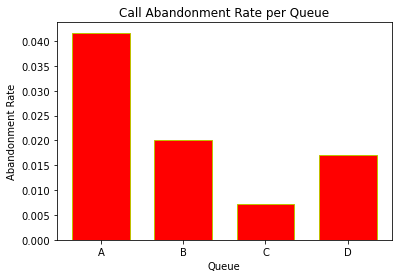

In [229]:
# Create visualization 1 here
# The dictionary abandonment_rates has the data you need.

import matplotlib.pyplot as plt

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]

dict = {'A': 0.0417, 'B': 0.0201, 'C': 0.0073, 'D': 0.0170}
x = list(dict.keys())
y = list(dict.values())
plt.bar(x,y, color='Red', edgecolor= 'y', width=0.7)
plt.title('Call Abandonment Rate per Queue',color = 'black')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')
plt.show()



In [230]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

plt = df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df[df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table

# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df[df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  


#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100


wait_stats = [2.5, 2.4, 3.6, 2.13, 2.91, 2.79, 2.61, 3.16, 3.27, 3.6, 3.4, 2.9, 3.4, 3.1, 3, 2.6, 3.6, 2.9, 3.5, 3.3]
service_stats = [50, 60, 30, 75, 45.45, 42.86, 55.55, 30.77, 27.27, 20, 22.22, 33.33, 27.27, 33.33, 43.75, 53.85, 12.5, 41.67, 33.33, 33.33]
reps = ['Alice', 'Amanda', 'Andy', 'Brent', 'Cam', 'Duke', 'Eric', 'George', 'Helga', 'Joe', 'Josh', 'Karl', 'Kate', 'Lilly', 'Randy', 'Sandy', 'Sharon', 'Susan', 'Todd', 'Xander']
plt.plot(reps, wait_stats, label = 'Average Speed of Answer')
plt.plot(reps, service_stats, label = 'Service Level')
plt.xlabel('Reps')
plt.ylabel('Stats')
plt.title('Service Level and Avg Speed per Rep')
plt.show()

#couldn't get this chart to output correctly

KeyError: "None of [Index(['Alice', 'Amanda', 'Andy', 'Brent', 'Cam', 'Duke', 'Eric', 'George',\n       'Helga', 'Joe', 'Josh', 'Karl', 'Kate', 'Lilly', 'Randy', 'Sandy',\n       'Sharon', 'Susan', 'Todd', 'Xander'],\n      dtype='object')] are in the [columns]"

AttributeError: 'DataFrame' object has no attribute 'title'

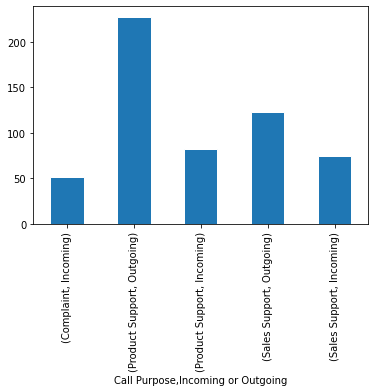

In [231]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need
purpose_group = df.groupby("Call Purpose")

call_purposes = ["Complaint", "Product Support", "Sales Support"]

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

purpose_counts.plot.bar(edgecolor='white')
plt.title('Call Type by Purpose', color='black')
plt.xticks(color = 'black')
plt.yticks(color = 'black')
plt.xlabel('Purpose', color='black')
plt.ylabel('Number Incoming or Outgoing', color='black')
style.use('ggplot')

plt.show()


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

In [ ]:
#1. Chart style that makes most sense here is a standard bar chart for ease of comparison.
#It's unclear if this data is presented over time - if so that would possibly change my answer.

#2. This is a bar chart (grouped if able to make it so).
# Ideally a scatter plot would be used but seems too complex to execute (1 axis %, another a time variable)
#A multi line chart - my second option - would have too many lines to be legible.

#3. The chart style that makes most sense here is a grouped bar chart. 
# It will be easy to interpret because there are only 3 purpose options, and 2 call types (in or out going)

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

In [ ]:
df.sum()

In [ ]:
df.groupby('Branch').sum()

In [237]:
# #1. The South branch has a lower abandonment rate and average speed of answer. 
# It does lag behind the North branch on service level, but the difference is less than 2%. 
# In general, the two branches are fairly similar in KPIs, but presently I would consider the South Branch most efficient.

#2. Not to feed into the horrible, stingy manager stereotype but both branches have similar KPIs. 
#The main differences I see are more related to volume. Retraining and incentives could produce better results without increasing the team.
#I would propose hiring 2 or 3 new staff and providing incentives/rewards for efficiency for current reps with the remaining budget.

#That said:
# The North branch has worse KPIs and would benefit from additional staff - reco is 2 more. 
# South Branch has higher volume and not providing more resources could hurt morale - reco is 1 more.


#3. I would like to know if this call center has any SLAs or benchmarks.
# This could include what % of calls must be answered, target avg wait time, etc. How does PTO/absences impact workflow?
# Do teams have sufficient members to accomodate absences, etc.

#Are all reps equally trained to handle different types of calls, or are there varying areas of expertise?

## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
